<a href="https://colab.research.google.com/github/mattHanson733/DSD_Research_Project/blob/main/DSD_Final_Project_Matthew_Hanson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Investigation Into What Factors May Influence College Graduation Rate***

### **Author Info**

By: Matthew Hanson

Date: 7/31/23 12:40 AM

Email: matthewhanson733@gmail.com


### **Program Info**

Program: Digital Scholars Summer '23

Course: Data Science Discovery

Assignment: Final Project

Teacher: Evangelos Tsiamalos

## Initialization

### Import packages

In [218]:
## Data Manipulation
import pandas as pd

## Working with numbers
import math
import numpy as np

## Statistical tools
import scipy.stats as st

## Data plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

## Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## k-mean clustering alogrithim
from sklearn.cluster import KMeans

### Import dataset

In [219]:
dataset_path = "/content/drive/MyDrive/DSD Project Dataset/Year 2021/College Data Formatted - Year 2021.csv"

df_2021_full = pd.read_csv(dataset_path)

### Clean dataset (remove NaN values)

In [220]:
df_2021 = df_2021_full.dropna()

## Classes and helper Functions

In [221]:
#@title SampleStats: class for storing descriptive statistics {display-mode: "form"}

class SampleStats():

    def __init__(self, stats: list[np.number], label: str | None = None) -> None:
        self.mean: np.number = stats[0]
        self.median: np.number = stats[1]
        self.variance: np.number = stats[2]
        self.size: np.number = stats[3]
        self.label: str = label if label else "NA"

    def __repr__(self):
        return f"---{self.label}--- \n mean: {self.mean} \n median: {self.median} \n variance: {self.variance} \n size: {self.size}"

    def tolist(self) -> list[np.number]:
        return [
            self.mean,
            self.median,
            self.variance,
            self.size
        ]

In [222]:
#@title elim_outliers: function that removes outliers from a DataFrame column {display-mode: "form"}

def elim_outliers(data: pd.DataFrame, column_name: str, u_id_column: str):
        ## Don't mutate original data
        data_copy = data.loc[:, [u_id_column, column_name]]

        ## Find the 0.25 and 0.75 qunatiles
        q_1, q_3 = data[column_name].quantile([0.25, 0.75])

        ## Find the Inter-Quartile Range (IQR)
        IQR = q_3 - q_1

        ## Define the upper and lowers bounds for evaluating an outlier
        upper_bound = q_3 + (1.5 * IQR)
        lower_bound = q_1 - (1.5 * IQR)

        ## Filter data to be within the upper and lower bounds
        data_copy = data_copy[ ( data_copy[column_name] < upper_bound ) & ( data_copy[column_name] > lower_bound ) ]

        return data_copy

In [223]:
#@title Render frames for 3D plot animation {display-mode: "form"}

# %matplotlib widget
# import matplotlib as mpl
# from google.colab import files

# """
# Animation code from: https://matplotlib.org/stable/gallery/mplot3d/rotate_axes3d_sgskip.html

# Color bar code from: https://www.geeksforgeeks.org/matplotlib-pyplot-colorbar-function-in-python/


# """


# chunks = [
#     range(0, 360),
#     range(360, 720),
#     range(720, 1080),
#     range(1080, 1441),

# ]
# for chunk in chunks:

# ### Code from  ###

#     for angle in chunk:
        # fig = plt.figure(figsize = (10, 7))
        # ax = fig.add_subplot(projection='3d')

        # # Creating plot
        # ax.scatter3D(df_2021_condensed_norm["Average salary equated to 9 months of full-time instructional staff - professors"], df_2021_condensed["Tuition and fees"], df_2021_condensed[grad_rate],
        #                 c = df_2021_condensed_norm["cluster"], cmap="Set1")

        # ax.set_xlabel('Average Professor Salary')
        # ax.set_ylabel('Tution and Fess')
        # ax.set_zlabel('Graduation Rate')


        # ### Code from https://www.geeksforgeeks.org/matplotlib-pyplot-colorbar-function-in-python/ ###


        # # Create the colorbar
        # cmap = plt.get_cmap('Set1') # colormap


        # norm = mpl.colors.Normalize(vmin=0, vmax=1) # Normalizer


        # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) # creating ScalarMappable
        # sm.set_array([])

        # plt.colorbar(sm, ticks=np.linspace(0, 1, 5), label="cluster") # add colorbar to plt

#         ### --- ###



#         # Normalize the angle to the range [-180, 180] for display
#         angle_norm = (angle + 180) % 360 - 180

#         # Cycle through a full rotation of elevation, then azimuth, roll, and all
#         elev = azim = roll = 0
#         if angle <= 360:
#             elev = angle_norm
#         elif angle <= 360*2:
#             azim = angle_norm
#         elif angle <= 360*3:
#             roll = angle_norm
#         else:
#             elev = azim = roll = angle_norm

#         # Update the axis view and title
#         ax.view_init(elev, azim, roll)
#         plt.title(f"Elevation: {elev}°, Azimuth: {azim}°, Roll: {roll}°' \n Average Professor Salary vs. Tuition and Fees vs. Graduation Rate")

        ## Need to update path
#         plt.savefig(f"/content/long_3D_animation_frames/frame_{angle}.png")

#         plt.close(fig)




In [224]:
#@title Turn 3D plot animation frame sequence into GIF {display-mode: "form"}

# ## Code from https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python

# import imageio

# filenames = []
# for i in range(0, 360*4 + 1):
    ## Need to update path
#     filenames.append(f"/content/drive/MyDrive/long_3D_animation_frames/frame_{i}.png")

    ## Need to update path
# with imageio.get_writer("/content/full_3D_plot_animation.gif", mode="I") as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)

## Exploratory analysis

### Variables for analysis

In [225]:
## All of the variables to be investigated
analysis_columns = [
    "Total enrollment",
    "Tuition and fees",
    "Student-to-faculty ratio",
    "Average salary equated to 9 months of full-time instructional staff - professors",
    "Number of instructors",
    "Graduation rate, total cohort"
]

## All of the independent variables
independent_variables = analysis_columns[:5]

## Dependent variable
grad_rate = "Graduation rate, total cohort"

### Check for and remove outliers

We need to check for and eliminate any outliers before we calculate our descriptive statistics


This is to remove any extreme values will may throw off our calculations Doing this will ensure that our numbers are as accurate as possible

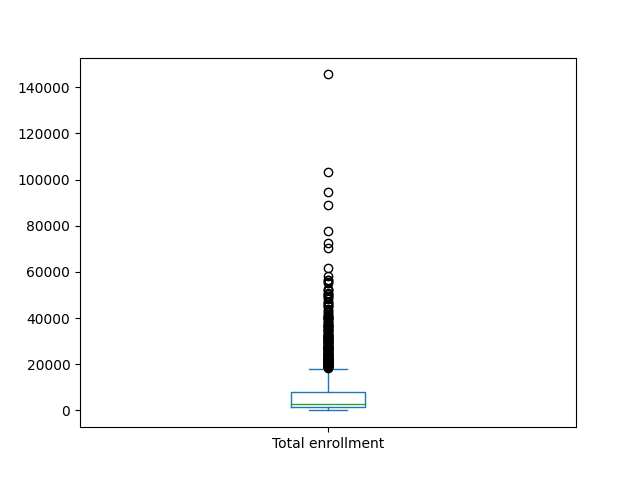

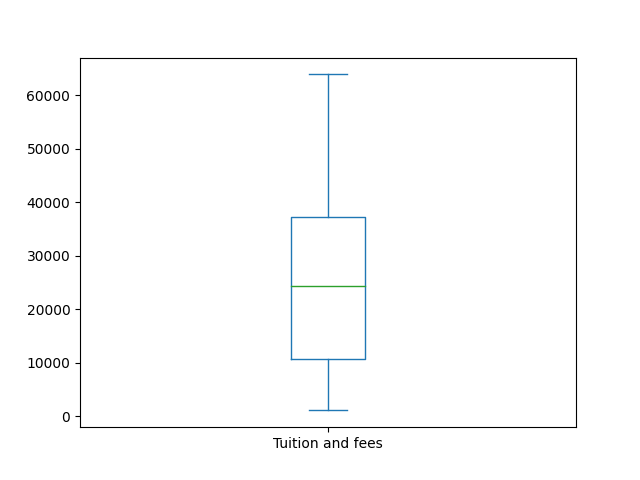

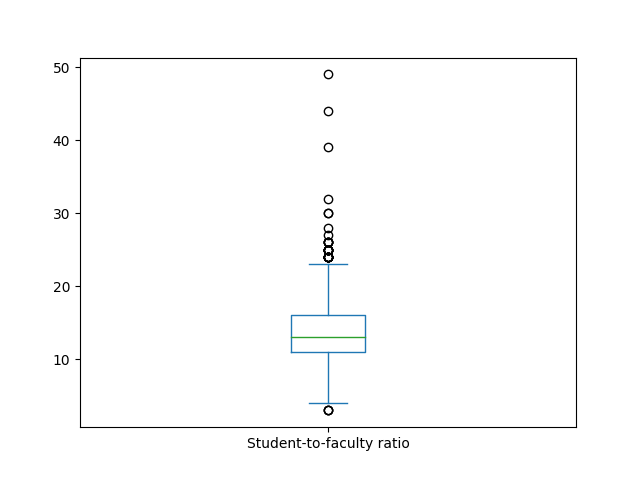

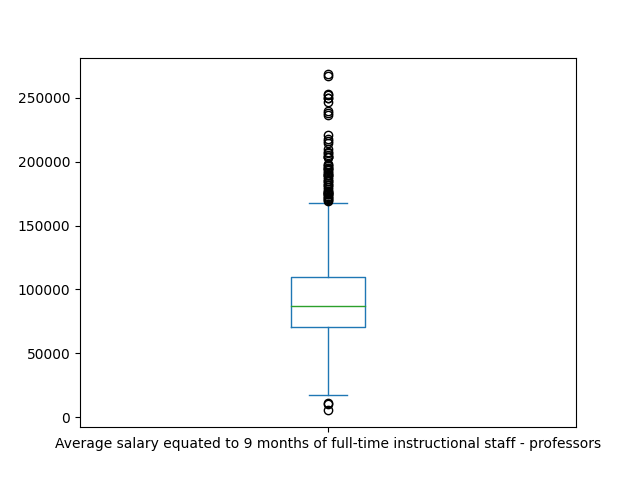

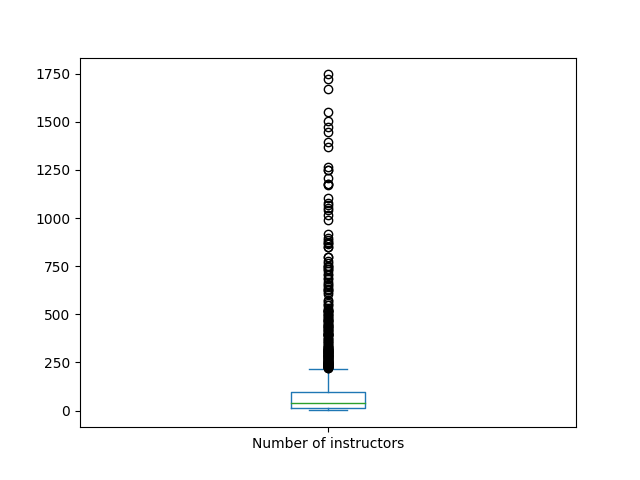

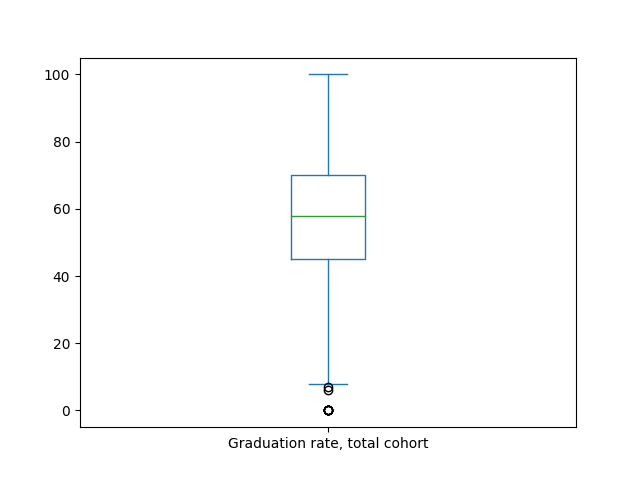

In [226]:
for col in analysis_columns:
    df_2021[[col]].plot.box()

Remove outliers from the dataset

In [227]:
## Eliminate the oultiers for each column in df_2021 and store them as DataFrames in a dictionary
outliers_removed_data = {}
for column in analysis_columns:
    outliers_removed_data[column] = elim_outliers(df_2021, column, "unitid")

## Find the DataFrame with the most data
## (This will serve as the basis column for a merge later on)
for data in outliers_removed_data:
    print( len( outliers_removed_data[data] ) )

## Longest column is "Tuition and fees"

## Store the "Tuition and fees" DataFrame in a variable
O_R_tuition = outliers_removed_data["Tuition and fees"]

## Remove "Tution and fees" entry from the dictionary so it isn't merged twice
del outliers_removed_data["Tuition and fees"]

## Create the DataFrame to store the merge and set its starting data to the "Tuition and fees" data
df_2021_condensed = O_R_tuition

## Merge all the data in outliers_removed_data into one DataFrame, according to the shared "unitid" key
for column in outliers_removed_data:
    df_2021_condensed = df_2021_condensed.merge(
        outliers_removed_data[column], how="left", on="unitid"
    )

df_2021_condensed

1337
1498
1462
1440
1320
1488


,unitid,Tuition and fees,Total enrollment,Student-to-faculty ratio,Average salary equated to 9 months of full-time instructional staff - professors,Number of instructors,"Graduation rate, total cohort"
0,100654,10024.0,5969.0,18.0,105789.0,39.0,28.0
1,100663,8568.0,NaN,19.0,148552.0,NaN,62.0
2,100706,11338.0,9636.0,19.0,130351.0,73.0,61.0
3,100724,11068.0,3964.0,13.0,85327.0,62.0,28.0
4,100751,11620.0,NaN,19.0,151945.0,NaN,72.0
...,...,...,...,...,...,...,...
1493,489937,14580.0,988.0,10.0,41732.0,5.0,50.0
1494,490805,7942.0,8794.0,15.0,101275.0,76.0,40.0
1495,491525,6380.0,77.0,6.0,NaN,8.0,38.0
1496,492801,7924.0,847.0,12.0,48857.0,1.0,31.0


#### *Figure* || Boxplot before and after outlier removal

<Axes: title={'center': 'Before Outliers Removed'}>

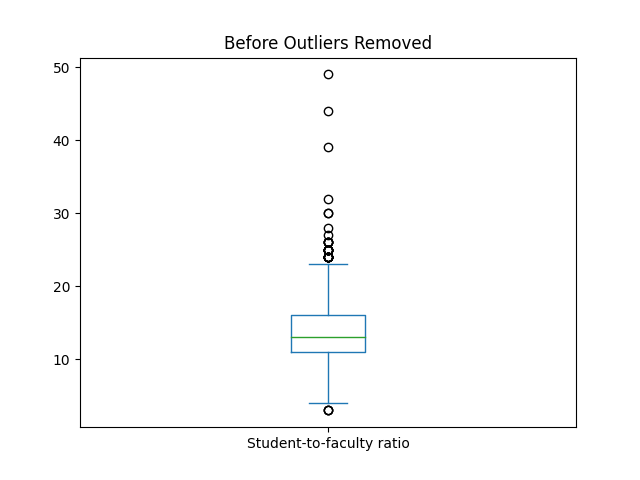

In [228]:
df_2021[["Student-to-faculty ratio"]].plot.box(title="Before Outliers Removed")

<Axes: title={'center': 'After Outliers Removed'}>

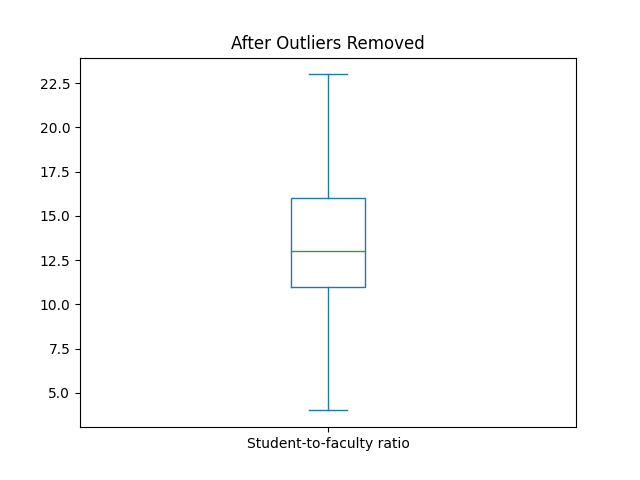

In [229]:
df_2021_condensed[["Student-to-faculty ratio"]].plot.box(title="After Outliers Removed")

### Descriptive Stats

In [230]:
## Remove the rows with NA values
df_2021_condensed = df_2021_condensed.dropna().reset_index()

## Remove the duplicate index column
df_2021_condensed = df_2021_condensed.drop(columns=["index"])


#### Mean, median, variance, and sample size for each variable

In [231]:
sample_stats = {}
for column in analysis_columns:
    sample_stats[column] = SampleStats(
        [
            df_2021_condensed[column].mean(),
            df_2021_condensed[column].median(),
            df_2021_condensed[column].var(),
            len( df_2021_condensed[column] ),
        ],
        label = column
    )


for stats in sample_stats:
    print(sample_stats[stats])
    print("\n")

---Total enrollment--- 
 mean: 3734.382657120127 
 median: 2320.0 
 variance: 13493028.058074778 
 size: 1257


---Tuition and fees--- 
 mean: 26560.403341288784 
 median: 27300.0 
 variance: 228503334.554543 
 size: 1257


---Student-to-faculty ratio--- 
 mean: 12.94272076372315 
 median: 13.0 
 variance: 11.611366158429991 
 size: 1257


---Average salary equated to 9 months of full-time instructional staff - professors--- 
 mean: 86071.88146380271 
 median: 83354.0 
 variance: 612860705.2239953 
 size: 1257


---Number of instructors--- 
 mean: 45.58870326173429 
 median: 30.0 
 variance: 1954.0400952120358 
 size: 1257


---Graduation rate, total cohort--- 
 mean: 55.37947494033413 
 median: 56.0 
 variance: 290.2372535457489 
 size: 1257




## Linear Analysis

### Exploratory observations

#### Scatter Plots

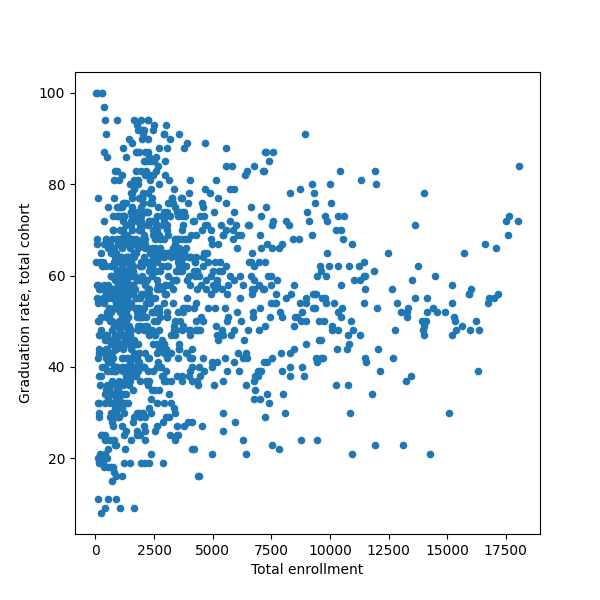

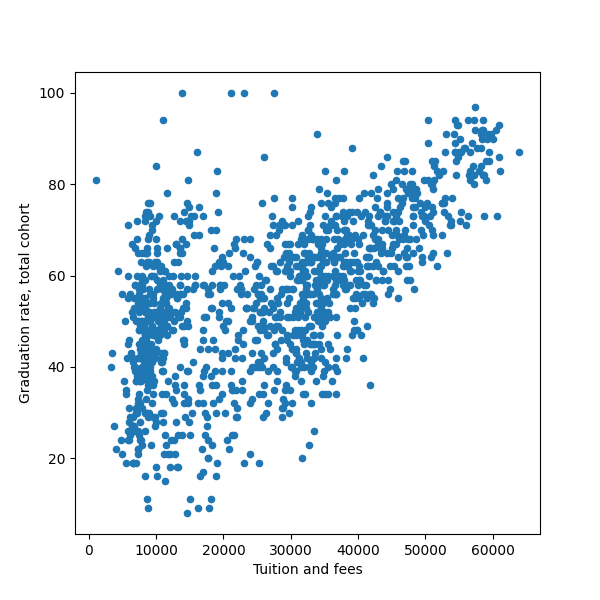

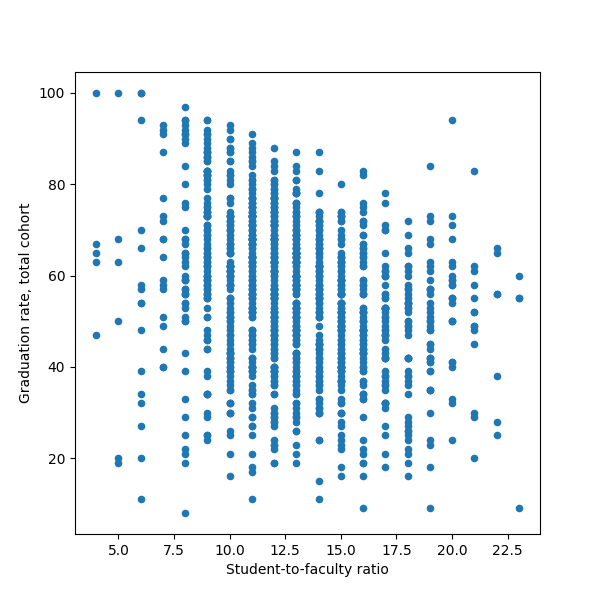

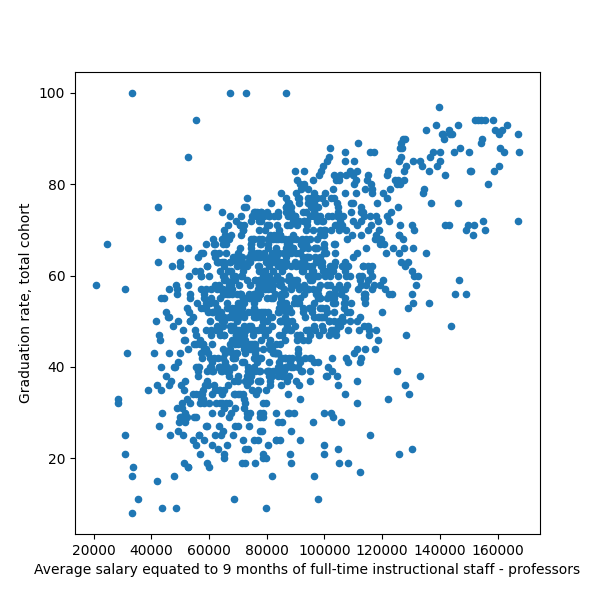

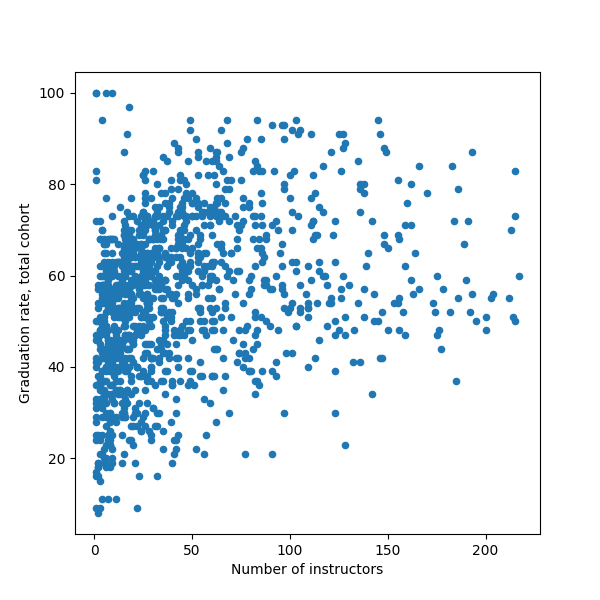

In [232]:
for column in independent_variables:
    df_2021_condensed.plot.scatter(x = column, y = grad_rate, figsize=(6, 6))

#### Linear Correlations

In [233]:
df_2021_condensed.corr()[grad_rate]

unitid                                                                             -0.057600
Tuition and fees                                                                    0.612448
Total enrollment                                                                    0.036911
Student-to-faculty ratio                                                           -0.270878
Average salary equated to 9 months of full-time instructional staff - professors    0.497550
Number of instructors                                                               0.297809
Graduation rate, total cohort                                                       1.000000
Name: Graduation rate, total cohort, dtype: float64

### Linear Regressions

The variables that seem to have the most impact on the graduation rate are:

1.   Tuition and fees (~ 0.61)
2.   Average salary of professors (~ 0.49)
3.   Number of instructors (~ 0.28)
4.   Student-to-faculty ratio (~ -0.27)


In [234]:
focus_independent_variables = [
    "Tuition and fees",
    "Average salary equated to 9 months of full-time instructional staff - professors",
    "Number of instructors",
    "Student-to-faculty ratio",
]

#### Model 1 (top four predictor variables)

In [235]:
## Select top four highest LinCorr predictor vars (exluding full-time-retention rate since it is just graduation rate per year)
X = df_2021_condensed[focus_independent_variables].dropna()
Y = df_2021_condensed[grad_rate]

## Create a model
model = LinearRegression(fit_intercept=True)

## Fit the model to the data
model.fit(X, Y)

LinearRegression()

In [236]:
intercept = model.intercept_
intercept

28.841531299816765

In [237]:
slopes = model.coef_
slopes

array([ 5.72731188e-04,  1.65368740e-04,  7.94370698e-02, -5.04458024e-01])

$R^2$ Calculation

In [238]:
R2 = r2_score(Y, model.predict(X))
R2

0.5195134612711894

Adjusted $R^2$ Calculation

In [239]:
## Number of observations (sample size)
n = len( df_2021_condensed )

## Number of predictor variables
k = len( focus_independent_variables )

adj_R2 = 1 - (  (1-R2)*(n-1)  / (n-k-1) )

adj_R2

0.5179783605084775

In [240]:
model_1_results = {
    "Predictor Variables": focus_independent_variables,
    "Response Variables": grad_rate,
    "Model Ref": model,
    "Intercept": intercept,
    "Slope(s)": slopes,
    "R2": R2,
    "Adjusted R2": adj_R2,
}

#### Model 2 (top two predictor variables)


In [241]:
## Select predictor vars withhighest linear correlations
X_alt = df_2021_condensed[["Tuition and fees", "Average salary equated to 9 months of full-time instructional staff - professors"]]
Y_alt = df_2021_condensed[grad_rate]

## Create a model
model_alt = LinearRegression(fit_intercept=True)

## Fit the model to the data
model_alt.fit(X_alt, Y_alt)

LinearRegression()

In [242]:
intercept_alt = model_alt.intercept_
intercept_alt

19.02447517544389

In [243]:
slopes_alt = model_alt.coef_
slopes_alt

array([0.00057883, 0.00024376])

In [244]:
R2_alt = r2_score(Y_alt, model_alt.predict(X_alt))
R2_alt

0.49079112607956166

In [245]:
n = len( df_2021_condensed )
k = 2

adj2_R2 = 1 - (  (1-R2_alt)*(n-1)  / (n-k-1) )

adj2_R2

0.4899789907144573

#### Compile results into DataFrame

In [246]:
lin_reg_results = {
    "Predictor Variables": [focus_independent_variables, ["Tuition and fees", "Average salary equated to 9 months of full-time instructional staff - professors"] ],
    "Response Variables": [grad_rate, grad_rate],
    "Model Ref": [model, model_alt],
    "Intercept": [intercept, intercept_alt],
    "Slope(s)": [slopes, slopes_alt],
    "R2": [R2, R2_alt],
    "Adjusted R2": [adj_R2, adj2_R2]
}

In [247]:
lin_reg_df = pd.DataFrame(index=["Model 1", "Model 2"], data=lin_reg_results)

In [248]:
lin_reg_df

,Predictor Variables,Response Variables,Model Ref,Intercept,Slope(s),R2,Adjusted R2
Model 1,"[Tuition and fees, Average salary equated to 9...","Graduation rate, total cohort",LinearRegression(),28.841531,"[0.0005727311880162288, 0.00016536874034900025...",0.519513,0.517978
Model 2,"[Tuition and fees, Average salary equated to 9...","Graduation rate, total cohort",LinearRegression(),19.024475,"[0.0005788290302474946, 0.00024376215436504965]",0.490791,0.489979


## K-Means Clustering


### Building the model

#### Identify columns to be clustered

In [249]:
focus_columns = [*focus_independent_variables, grad_rate]
focus_columns

['Tuition and fees',
 'Average salary equated to 9 months of full-time instructional staff - professors',
 'Number of instructors',
 'Student-to-faculty ratio',
 'Graduation rate, total cohort']

#### Normalize the data


In [250]:
df_2021_condensed_norm = df_2021_condensed.copy()

for column in focus_columns:
    df_2021_condensed_norm[column] = df_2021_condensed_norm[column] / abs(df_2021_condensed_norm[column]).max()
df_2021_condensed_norm[focus_columns]

,Tuition and fees,Average salary equated to 9 months of full-time instructional staff - professors,Number of instructors,Student-to-faculty ratio,"Graduation rate, total cohort"
0,0.156907,0.632169,0.179724,0.782609,0.28
1,0.177475,0.778945,0.336406,0.826087,0.61
2,0.173249,0.509893,0.285714,0.565217,0.28
3,0.138687,0.545287,0.235023,0.652174,0.36
4,0.295844,0.461686,0.165899,0.434783,0.70
...,...,...,...,...,...
1252,0.557251,0.389852,0.165899,0.391304,0.70
1253,0.309494,0.505232,0.087558,0.608696,0.54
1254,0.228223,0.249380,0.023041,0.434783,0.50
1255,0.124317,0.605194,0.350230,0.652174,0.40


#### Create the model

In [251]:
model = KMeans(n_clusters=2)

#### Fit the model to the data

In [252]:
model.fit(df_2021_condensed_norm[focus_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

#### Add cluster values to main DataFrame

In [253]:
df_2021_condensed_norm["cluster"] = model.predict(df_2021_condensed_norm[focus_columns])

In [254]:
df_2021_condensed_norm.sort_values(by="cluster")

,unitid,Tuition and fees,Total enrollment,Student-to-faculty ratio,Average salary equated to 9 months of full-time instructional staff - professors,Number of instructors,"Graduation rate, total cohort",cluster
0,100654,0.156907,5969.0,0.782609,0.632169,0.179724,0.28,0
729,196219,0.140142,3522.0,0.565217,0.551598,0.152074,0.63,0
730,196237,0.127135,4381.0,0.652174,0.621657,0.101382,0.48,0
731,196246,0.134210,4738.0,0.695652,0.514369,0.262673,0.65,0
732,196264,0.119433,9462.0,0.652174,0.496435,0.188940,0.24,0
...,...,...,...,...,...,...,...,...
879,210331,0.535149,1082.0,0.521739,0.408568,0.082949,0.64,1
880,210401,0.842670,1785.0,0.521739,0.673832,0.350230,0.72,1
227,146719,0.720983,17498.0,0.608696,0.924813,0.847926,0.72,1
875,209825,0.780528,4033.0,0.478261,0.662304,0.202765,0.81,1


#### Compile the centroids by column

In [255]:
centroids = model.cluster_centers_

In [256]:
data_groups = {}

for i in range( len(centroids[0]) ):
        data_groups[focus_columns[i]] = ( centroids[0][i], centroids[1][i] )

data_groups

{'Tuition and fees': (0.2511508703396471, 0.6422762546062434),
 'Average salary equated to 9 months of full-time instructional staff - professors': (0.4770245366281651,
  0.5657025454222832),
 'Number of instructors': (0.20616422747759153, 0.21548352251443906),
 'Student-to-faculty ratio': (0.6131748686096512, 0.49330155338209913),
 'Graduation rate, total cohort': (0.45976648351648347, 0.6831947069943289)}

### Displaying the model

#### 2D Scatter Plots

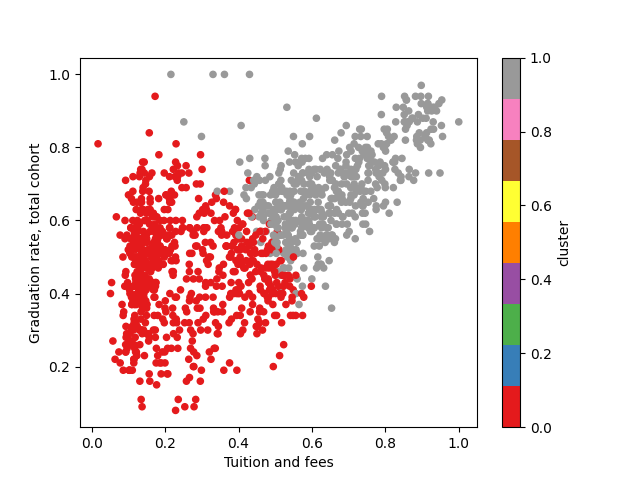

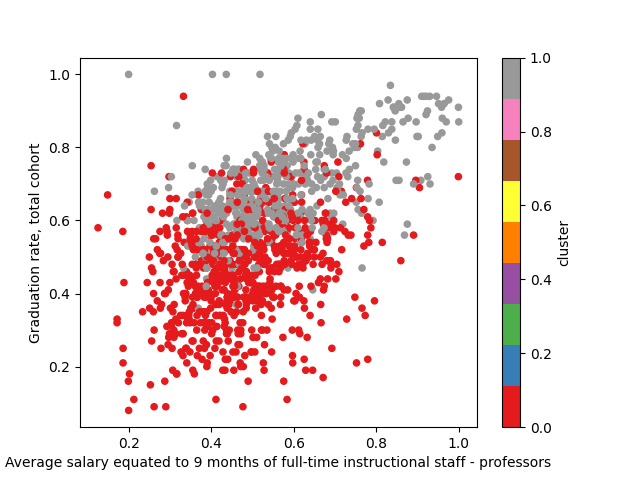

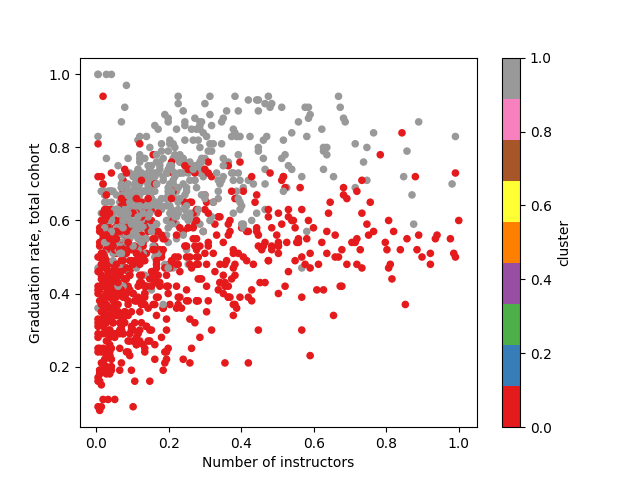

In [257]:
for col in focus_independent_variables:
    df_2021_condensed_norm.plot.scatter(
    x = col,
    y = grad_rate,

    c="cluster",
    colormap='Set1'
    )

### Plotting it in 3D
Making a 3D plot combining gradutaion rate, tuition and fess, and average professor salary

#### Magic to make 3D plot work interactively

In [260]:
!pip3 install ipympl
from google.colab import output
output.enable_custom_widget_manager()

#### Create and render the interactive 3D plot

<ipython-input-261-e604c2b12f78>:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=np.linspace(0, 1, 5), label="cluster") # add colorbar to plt


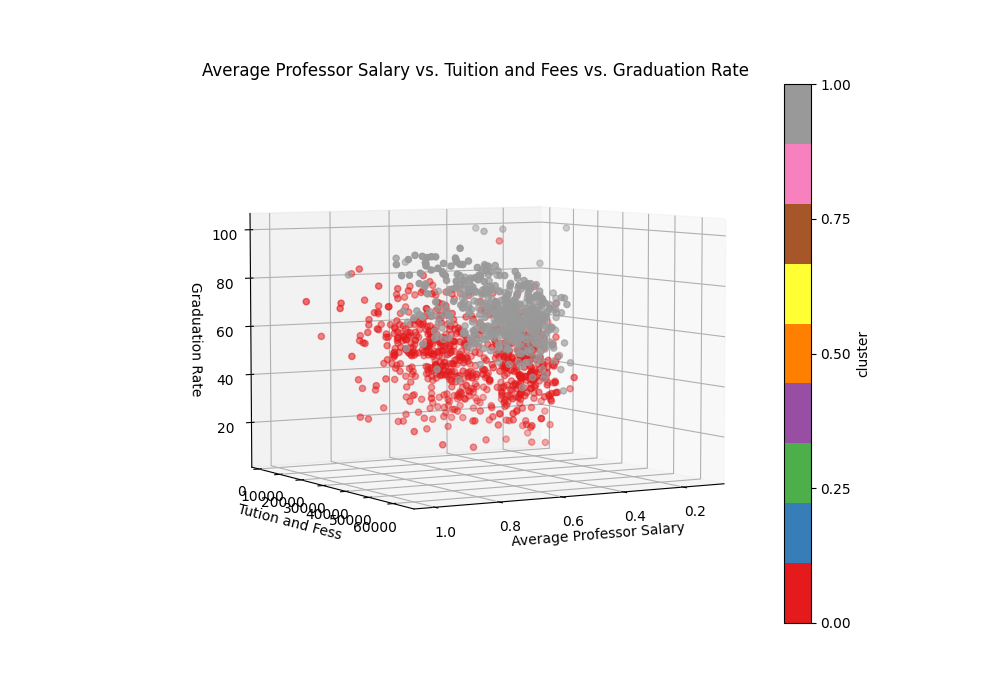

In [261]:
%matplotlib widget

## Creating the plot
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

## Adding the data to the plot
ax.scatter3D(df_2021_condensed_norm["Average salary equated to 9 months of full-time instructional staff - professors"], df_2021_condensed["Tuition and fees"], df_2021_condensed[grad_rate],
                        c = df_2021_condensed_norm["cluster"], cmap="Set1")
## Set the plot title
plt.title("Average Professor Salary vs. Tuition and Fees vs. Graduation Rate")

## Set the axis labels
ax.set_xlabel('Average Professor Salary')
ax.set_ylabel('Tution and Fess')
ax.set_zlabel('Graduation Rate')

## Set the camera elevation, azimuth, and roll
ax.view_init(5, 60, 0)


### ----- Colorbar code from https://www.geeksforgeeks.org/matplotlib-pyplot-colorbar-function-in-python/ ----- ###

## Create the colorbar
cmap = plt.get_cmap('Set1') # colormap


norm = mpl.colors.Normalize(vmin=0, vmax=1) # Normalizer


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) # creating ScalarMappable
sm.set_array([])

plt.colorbar(sm, ticks=np.linspace(0, 1, 5), label="cluster") # add colorbar to plt

plt.show()




---



## Note to whoever reads/grades this

Thank you for taking the time to read through all of this code. I'm sorry if it's kinda messy and hacky, but I didn't have time to go through and optimize it all. Despite that, I really enjoyed working on this project and definitely want to come back to it in the future.

Also I would love to know if there is anything I could do better in terms of code structure, implementation, etc.

And, again, thank you for taking the time to read through all of this!